# CNNs

In [2]:
import torch
import numpy as np
import os, sys
from utils.CustomDataset import DatasetWithPaths
from utils.Training import Train
from models.PlainCNN import ConvNN
from torch.utils.data import DataLoader, random_split
from torchvision import transforms

/Users/mandakausthubh/anaconda3/envs/VRMiniProj/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/mandakausthubh/anaconda3/envs/VRMiniProj/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/mandakausthubh/anaconda3/envs/VRMiniProj/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/mandakausthubh/anaconda3/envs/VRMiniProj/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/mandakausthubh/anaconda3/envs/VRMiniProj/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/mandakausthubh/anaconda3/envs/VRMiniProj/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/mandakausthubh/anaconda3/envs/VRMiniProj/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functio

In [3]:
device = "cpu"

if torch.cuda.is_available():
    device = "cuda"
elif torch.mps.is_available():
    device = "mps"

In [ ]:
modelCNN = ConvNN(3).to(device=device)
print(modelCNN)

ConvNN(
  (ConvLayer1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Relu1): ReLU()
  (ConvLayer2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Relu2): ReLU()
  (Pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (hidden): Linear(in_features=128, out_features=1024, bias=True)
  (Gelu): GELU(approximate='none')
  (Final): Linear(in_features=1024, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [5]:
image_list = []
LabelIdx = { 'with_mask':0, 'without_mask':1 }
root = "./dataset/"
root = os.path.abspath(root)

for path, dirs, files in os.walk(root):
    for subdirs in dirs:
        for p, d, f in os.walk(os.path.join(path, subdirs)):
            for files in f:
                if files.endswith(".jpg"):
                    image_list.append((os.path.join(p, files), LabelIdx[subdirs]))

In [6]:
sum([1 if y == 0 else 0 for _, y in image_list]), sum([1 if y == 1 else 0 for _, y in image_list])

(1832, 1930)

In [7]:
class ToOneHot(object):

    def __init__(self, num_classes):
        self.num_classes = num_classes
        pass
    
    def __call__(self, label):
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)
        else:
            label = label.long()
        return torch.nn.functional.one_hot(label, num_classes=self.num_classes).type(torch.float32)
        # return torch.tensor(label)

In [8]:
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

label_transforms = transforms.Compose([
    ToOneHot(2)
])

Dataset = DatasetWithPaths(image_list, image_transforms, label_transforms)
Dataset[0][0].shape, Dataset[0][1]

(torch.Size([3, 128, 128]), tensor([1., 0.]))

In [9]:
TestDataset, TrainDataset = random_split(Dataset, [len(Dataset)//5, len(Dataset) - len(Dataset)//5])
TrainLoader = DataLoader(TrainDataset, batch_size=32, shuffle=True)
TestLoader = DataLoader(TestDataset, batch_size=32, shuffle=True)

optimizer = torch.optim.AdamW(modelCNN.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()

100%|██████████| 24/24 [00:01<00:00, 12.25it/s]


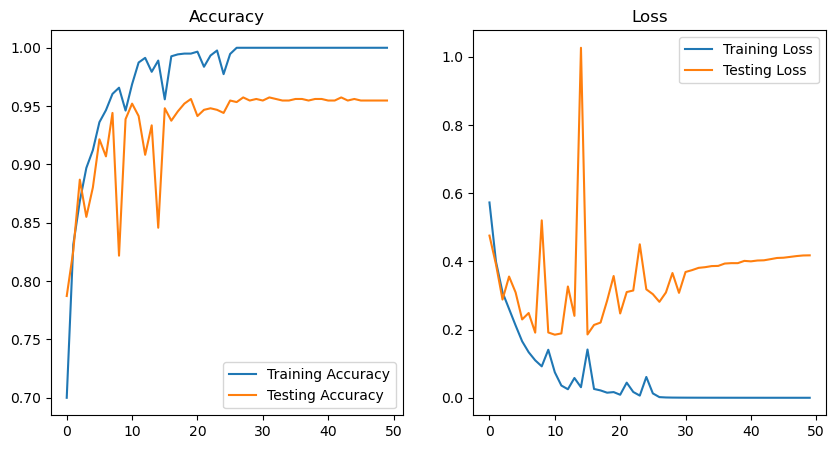

In [10]:
training_acc1, train_loss1, test_acc1, test_loss1 = Train(modelCNN, TrainLoader, TestLoader, optimizer=optimizer, criterion=criterion, epochs=50, device=device)

100%|██████████| 24/24 [00:01<00:00, 12.42it/s]


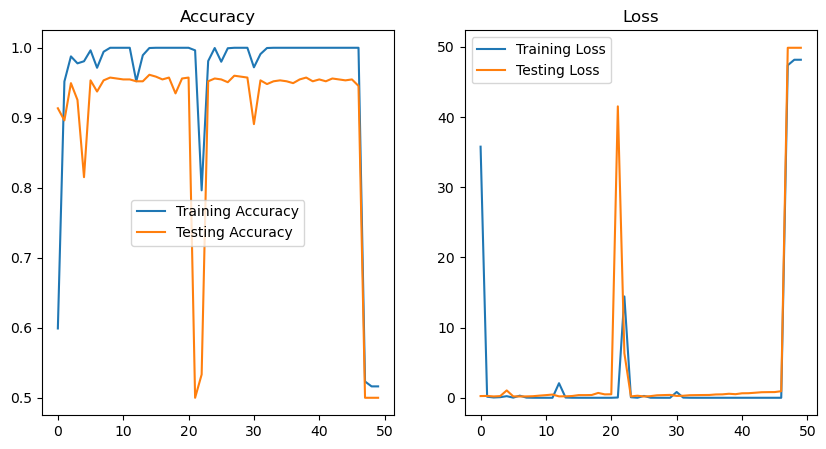

In [ ]:
optimizer = torch.optim.RMSprop(modelCNN.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()

modelCNN = ConvNN(3).to(device=device)

training_acc2, train_loss2, test_acc2, test_loss2 = Train(modelCNN, TrainLoader, TestLoader, optimizer=optimizer, criterion=criterion, epochs=50, device=device)

100%|██████████| 24/24 [00:01<00:00, 12.19it/s]


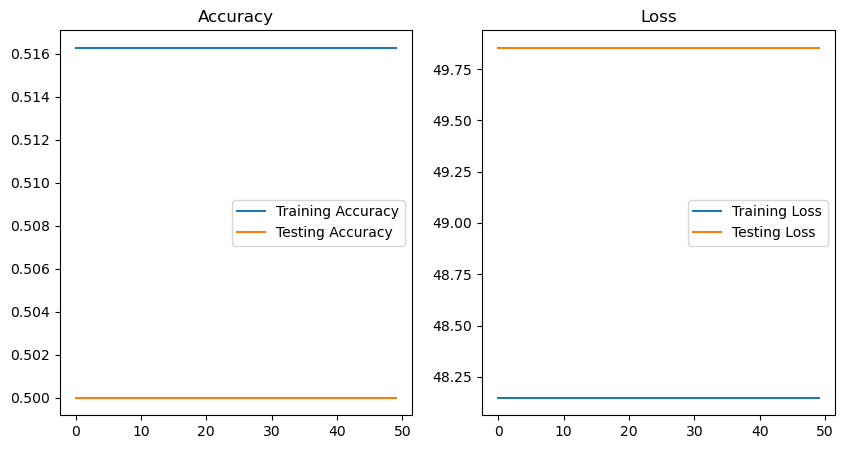

In [ ]:
optimizer = torch.optim.SGD(modelCNN.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()

modelCNN = ConvNN(3).to(device=device)

training_acc3, train_loss3, test_acc3, test_loss3 = Train(modelCNN, TrainLoader, TestLoader, optimizer=optimizer, criterion=criterion, epochs=50, device=device)